# DS 3000 - DS Practicum 1

**Student Names**: Tommaso Maga, 

**Date**: 02/06/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1 - The DS Problem: 

In your own words, formulate the Data Science problem that you were given.

We were given the data science problem of providing a comprehensive analysis on a dataset contatining flight reports of Arline/Carrier On-time performance from 1987 to the present. Due to the volume of the data however, we will only be looking at a subset of the data: flights that departed from Arizona, Nevada and California in 2019.

## Question 2 - Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.


In [9]:
#Converting datatypes
import pandas as pd

df = pd.read_csv('/Users/tommasomaga/Downloads/2019_ONTIME_REPORTING_FSW.csv')

# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Convert DEP_TIME and ARR_TIME to integers
df['DEP_TIME'] = df['DEP_TIME'].fillna(0).astype(int)
df['ARR_TIME'] = df['ARR_TIME'].fillna(0).astype(int)

# Convert DISTANCE to float
df['DISTANCE'] = df['DISTANCE'].astype(float)

print(df.dtypes)

FL_DATE         datetime64[ns]
CARRIER_CODE            object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN                  object
ORIGIN_ST               object
DEST                    object
DEST_ST                 object
DEP_TIME                 int64
DEP_DELAY              float64
ARR_TIME                 int64
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE               float64
dtype: object


In [10]:
#Filling in missing data
# replace missing values with 'Unknown' in tail_num column
df['TAIL_NUM'] = df['TAIL_NUM'].fillna('Unknown')

# fill in missing values with the median in columns: dep_delay, arr_delay, and elapsed time
numeric_cols = ['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

missing_values = df.isna().sum()
missing_values_percentage = round(missing_values/(len(df))*100, 2)

print(missing_values_percentage)

print(df.describe())


FL_DATE         0.0
CARRIER_CODE    0.0
TAIL_NUM        0.0
FL_NUM          0.0
ORIGIN          0.0
ORIGIN_ST       0.0
DEST            0.0
DEST_ST         0.0
DEP_TIME        0.0
DEP_DELAY       0.0
ARR_TIME        0.0
ARR_DELAY       0.0
ELAPSED_TIME    0.0
DISTANCE        0.0
dtype: float64
                             FL_DATE        FL_NUM      DEP_TIME  \
count                        1897503  1.897503e+06  1.897503e+06   
mean   2019-07-03 07:04:02.585545984  2.049927e+03  1.322513e+03   
min              2019-01-01 00:00:00  1.000000e+00  0.000000e+00   
25%              2019-04-05 00:00:00  7.060000e+02  9.010000e+02   
50%              2019-07-04 00:00:00  1.636000e+03  1.318000e+03   
75%              2019-10-01 00:00:00  2.718000e+03  1.754000e+03   
max              2019-12-31 00:00:00  7.910000e+03  2.400000e+03   
std                              NaN  1.679758e+03  5.390720e+02   

          DEP_DELAY      ARR_TIME     ARR_DELAY  ELAPSED_TIME      DISTANCE  
count  1.89750

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  object        
 2   TAIL_NUM      object        
 3   FL_NUM        int64         
 4   ORIGIN        object        
 5   ORIGIN_ST     object        
 6   DEST          object        
 7   DEST_ST       object        
 8   DEP_TIME      int64         
 9   DEP_DELAY     float64       
 10  ARR_TIME      int64         
 11  ARR_DELAY     float64       
 12  ELAPSED_TIME  float64       
 13  DISTANCE      float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 202.7+ MB
None
Summary Statistics:
                             FL_DATE        FL_NUM      DEP_TIME  \
count                        1897503  1.897503e+06  1.897503e+06   
mean   2019-07-03 07:04:02.585545984  2.049927e+03  1.322513e+03   
min              

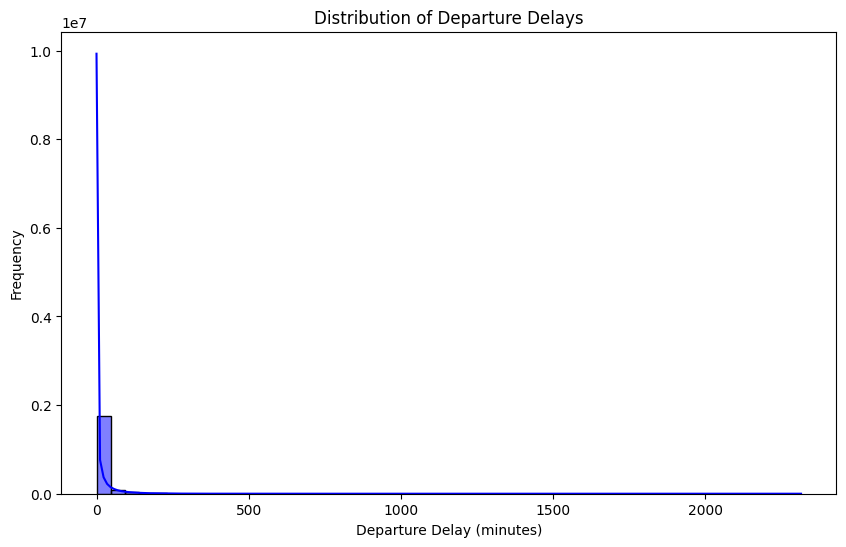

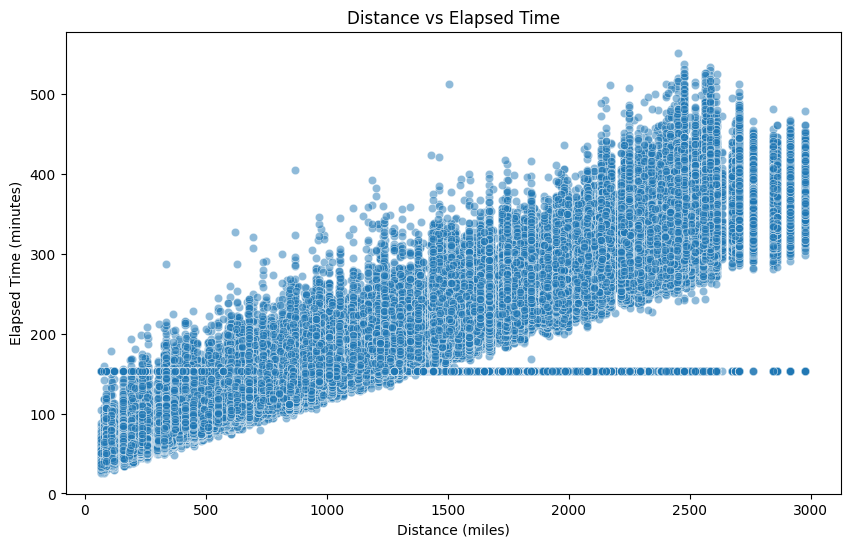

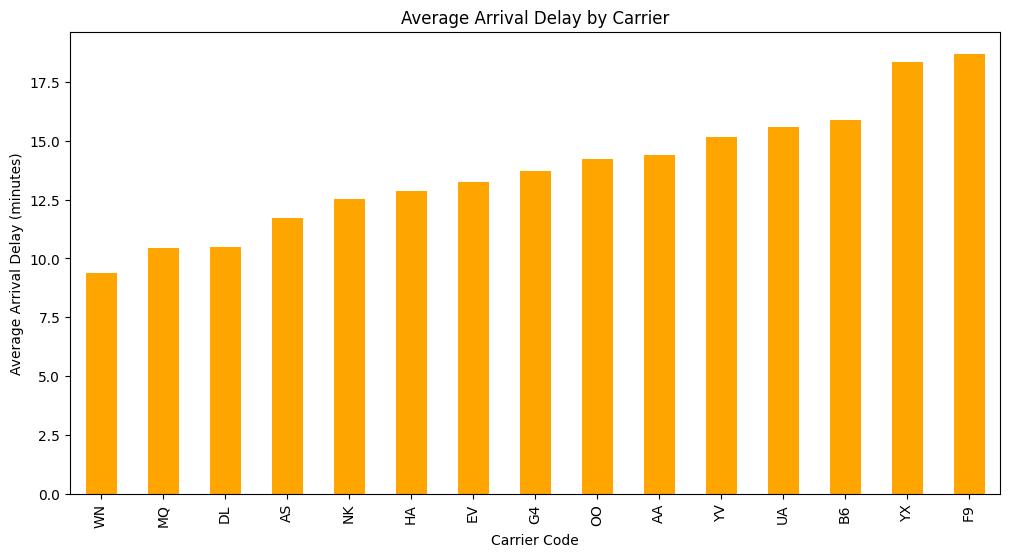

In [11]:
#summary statistics/visualizations
# General info about the dataset
print("Dataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

# Quick look at the first few rows
print("Sample Rows:")
print(df.head())

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Departure delays
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True, color='blue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distance vs elapsed time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='ELAPSED_TIME', data=df, alpha=0.5)
plt.title('Distance vs Elapsed Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Elapsed Time (minutes)')
plt.show()

# Average arrival delay by carrier
avg_arr_delay_by_carrier = df.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()

# Bar chart
plt.figure(figsize=(12, 6))
avg_arr_delay_by_carrier.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()


## Question 3 - (20 Points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.


The region with the most air traffic is CA with 1629725 flights.
We defined 'the most air traffic' as the region with most flights arriving in and originating from a certain region. 
We think that's the most rational way to determine air traffic as it is the total amount of flights in and out.


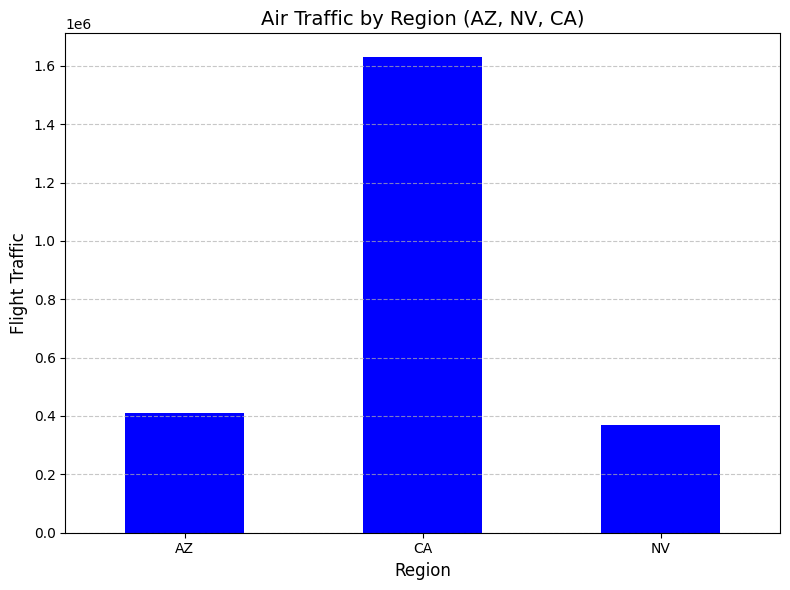

In [12]:
#1
# Count the number of flights originating in each state
origin_count = df['ORIGIN_ST'].value_counts()

# Count the number of flights arriving in each state
dest_count = df['DEST_ST'].value_counts()

# Combine both counts to get total traffic per state
total_traffic = origin_count.add(dest_count, fill_value=0)

# Filter for the states of interest (AZ, NV, CA)
states_of_interest = ['AZ', 'NV', 'CA']
region_traffic = total_traffic[total_traffic.index.isin(states_of_interest)]

# Determine the region with the most air traffic
most_traffic_region = region_traffic.idxmax()
most_traffic_count = region_traffic.max()

print(f"The region with the most air traffic is {most_traffic_region} with {most_traffic_count} flights.")
print("We defined 'the most air traffic' as the region with most flights arriving in and originating from a certain region. \nWe think that's the most rational way to determine air traffic as it is the total amount of flights in and out.")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
region_traffic.sort_index().plot(kind='bar', color='blue')
plt.title('Air Traffic by Region (AZ, NV, CA)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Flight Traffic', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

AZ:
Most Popular Destination Airports:
DEST
DEN    10432
LAX     9713
DFW     7888
SEA     6888
LAS     6835
Name: count, dtype: int64 



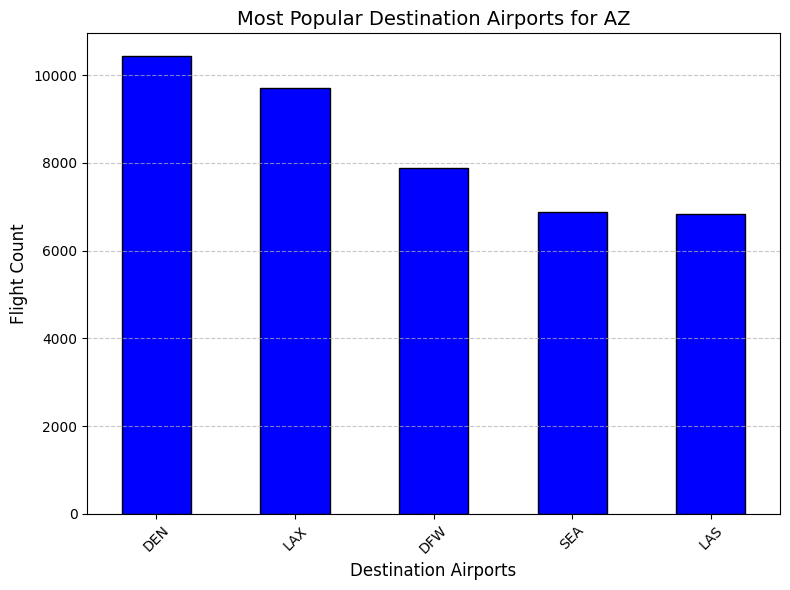

NV:
Most Popular Destination Airports:
DEST
LAX    13971
SFO     9425
DEN     8786
PHX     7903
SEA     7225
Name: count, dtype: int64 



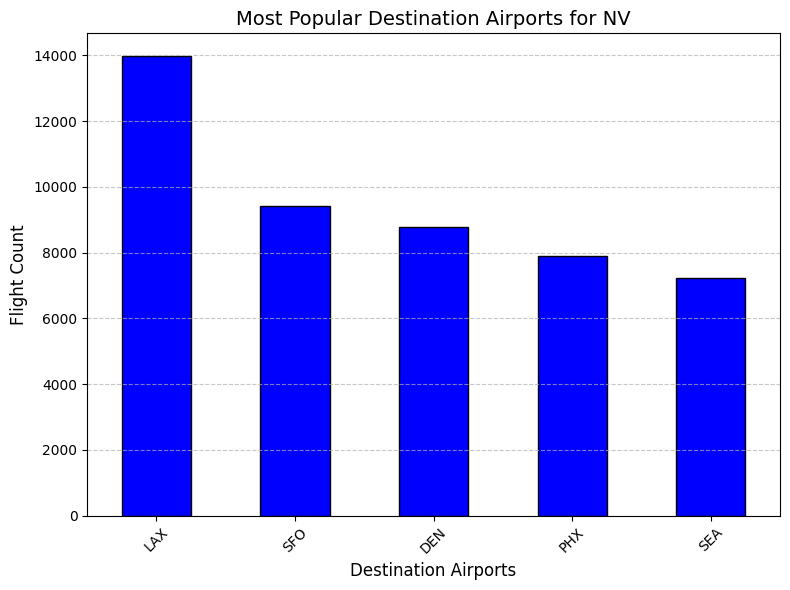

CA:
Most Popular Destination Airports:
DEST
PHX    49926
LAS    48972
SFO    45855
SEA    43744
LAX    41320
Name: count, dtype: int64 



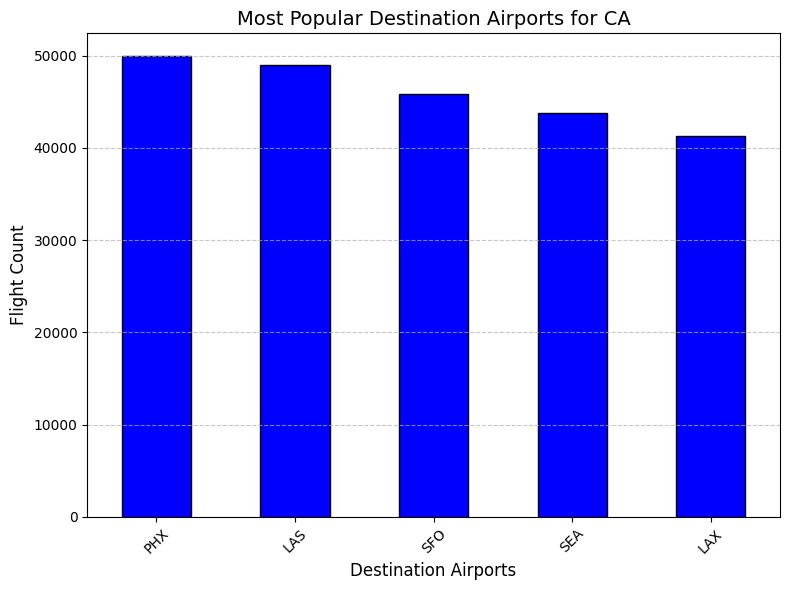

Observations:
There are shared popular destinations between AZ, NV, and CA. For example, LAX appears in the top 5 destinations for all three regions. Similarly, DEN is a shared destination for AZ and NV.


In [13]:
#2
import matplotlib.pyplot as plt

# Analyze and visualize the most popular destinations for each region
def analyze_and_plot(df, regions):
    for region in regions:
        # Filter and count the most popular destination airports for the region
        popular_destinations = df[df['ORIGIN_ST'] == region]['DEST'].value_counts().head(5)
        
        # Print the top destinations
        print(f"{region}:")
        print("Most Popular Destination Airports:")
        print(popular_destinations, "\n")
        
        # Plot the bar chart
        plt.figure(figsize=(8, 6))
        popular_destinations.plot(kind='bar', color='blue', edgecolor='black')
        plt.title(f'Most Popular Destination Airports for {region}', fontsize=14)
        plt.xlabel('Destination Airports', fontsize=12)
        plt.ylabel('Flight Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Define regions of interest
regions = ['AZ', 'NV', 'CA']

# Call the function
analyze_and_plot(df, regions)

# Add a comment summarizing the findings
print("Observations:")
print("There are shared popular destinations between AZ, NV, and CA. For example, LAX appears in the top 5 destinations for all three regions. Similarly, DEN is a shared destination for AZ and NV.")


AZ: Proportion of Flights by Airline/Operator (Top 10)
CARRIER_CODE
WN    32.064703
AA    29.736388
OO    11.641577
YV    10.664006
DL     4.701509
UA     4.160528
G4     2.873687
AS     1.710261
F9     1.344403
B6     0.512200
Name: count, dtype: float64 



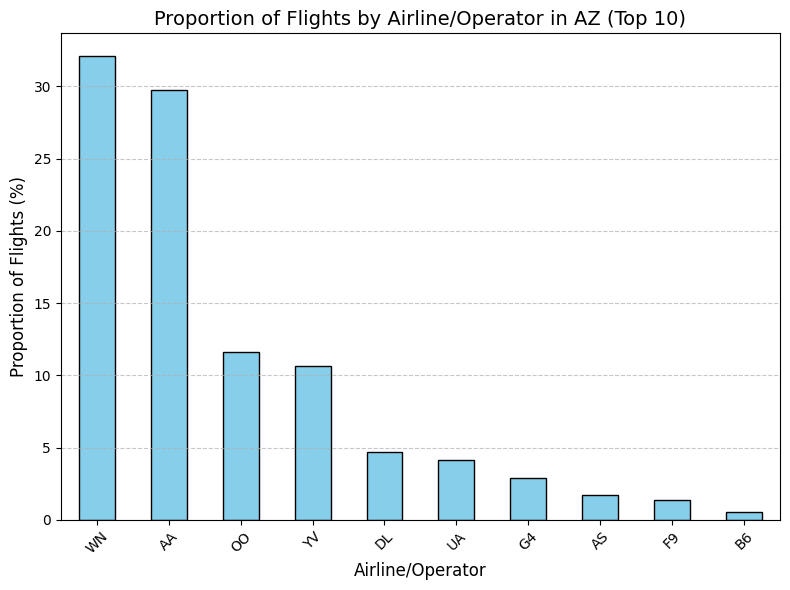

NV: Proportion of Flights by Airline/Operator (Top 10)
CARRIER_CODE
WN    42.894033
NK     9.640641
AA     8.888684
UA     8.330536
DL     7.875248
F9     5.122403
G4     5.070432
AS     4.409424
OO     4.038047
B6     2.536299
Name: count, dtype: float64 



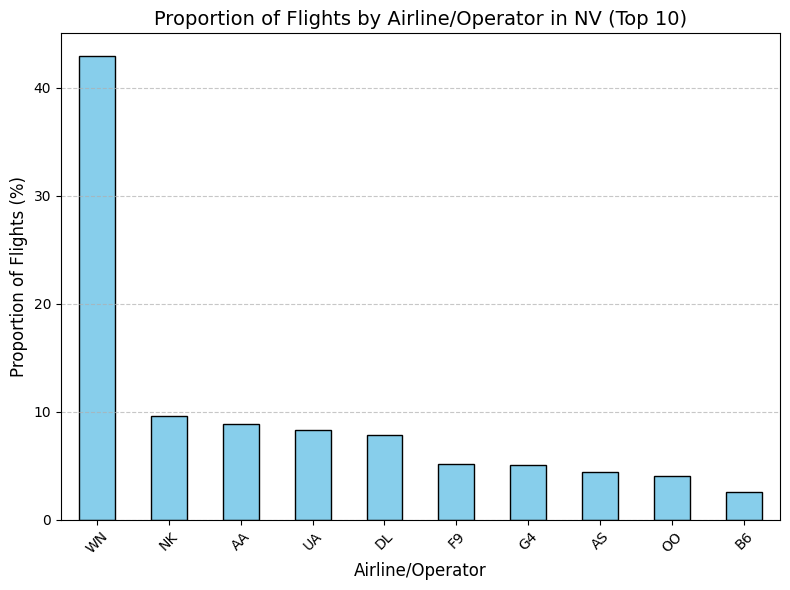

CA: Proportion of Flights by Airline/Operator (Top 10)
CARRIER_CODE
WN    31.586240
OO    17.544038
UA    13.532542
AA    10.528337
AS     9.145520
DL     9.099868
B6     3.341809
NK     1.720545
YV     1.187078
F9     0.842110
Name: count, dtype: float64 



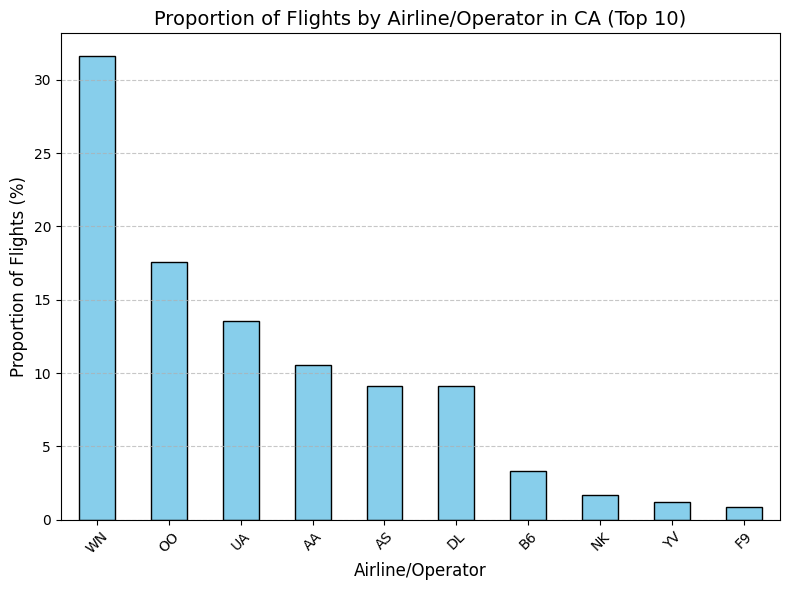

Explanation:
The visualizations show the top 10 airlines by their proportion of flights per each region. These proportions indicate popular airlines by region. For example, Southwest (WN) and United (UA) have a significant presence in the airline market.


In [14]:
#3
import matplotlib.pyplot as plt

# Function to calculate and visualize the proportion of flights by airline for a given region
def calculate_and_visualize_proportions(df, regions):
    for region in regions:
        # Filter flights originating from the specified region
        region_data = df[df['ORIGIN_ST'] == region]
        
        # Calculate the proportion of flights for each airline/operator
        airline_counts = region_data['CARRIER_CODE'].value_counts()
        airline_proportions = (airline_counts / airline_counts.sum()) * 100  # Convert to percentage
        
        # Get the top 10 airlines/operators
        top_airlines = airline_proportions.head(10)
        
        # Print the results
        print(f"{region}: Proportion of Flights by Airline/Operator (Top 10)")
        print(top_airlines, "\n")
        
        # Plot the bar chart
        plt.figure(figsize=(8, 6))
        top_airlines.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Proportion of Flights by Airline/Operator in {region} (Top 10)", fontsize=14)
        plt.xlabel('Airline/Operator', fontsize=12)
        plt.ylabel('Proportion of Flights (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Define regions of interest
regions = ['AZ', 'NV', 'CA']

# Call the function
calculate_and_visualize_proportions(df, regions)

# Add explanation
print("Explanation:")
print("The visualizations show the top 10 airlines by their proportion of flights per each region. These proportions indicate popular airlines by region. For example, Southwest (WN) and United (UA) have a significant presence in the airline market.")


## Question 4 - (20 Points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.


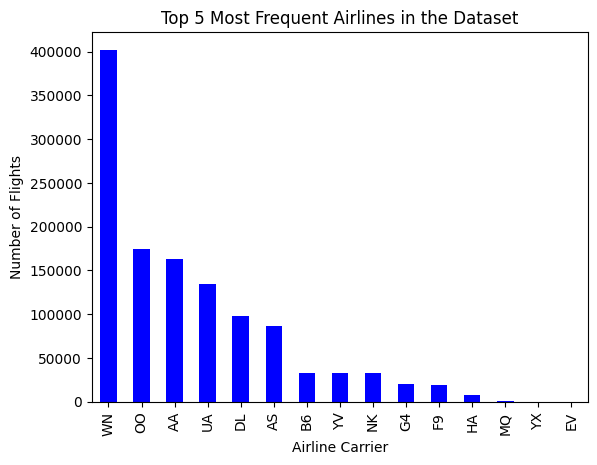

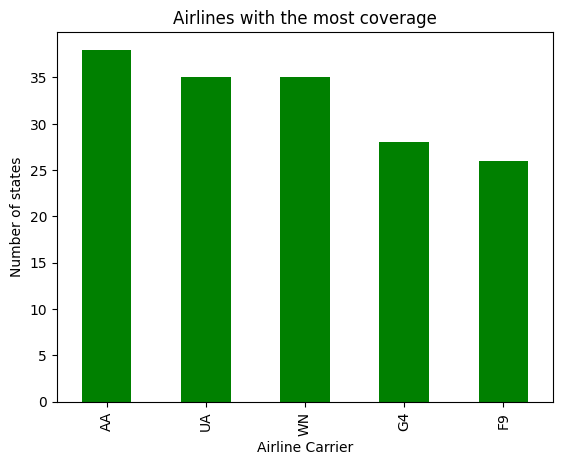

In [32]:
#1
#First pattern: frequency by carrier
filtered_df = df[df['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])]
Flight_Count = filtered_df['CARRIER_CODE'].value_counts()

Flight_Count.plot(kind='bar', color='blue')
plt.xlabel("Airline Carrier")
plt.ylabel("Number of Flights")
plt.title("Top 5 Most Frequent Airlines in the Dataset")
plt.show()

#2
#Second pattern: Coverage: How many unique states does each airline fly to

#Get the unique state codes for each carrier
num_of_States = filtered_df.groupby('CARRIER_CODE')['DEST_ST'].nunique().sort_values(ascending=False).head(5)

#Plot the graph
num_of_States.plot(kind='bar', color='green')
plt.xlabel("Airline Carrier")
plt.ylabel("Number of states")
plt.title("Airlines with the most coverage")
plt.show()


## Analysis

WN (Southwest Airlines) was the airline that has flown the most at over 400k flights. However, it was not the airline that flew to the most states. That was AA (American) that flies to over 35 states.

   CARRIER_CODE  min_dep_delay  max_dep_delay  avg_dep_delay  min_arr_delay  \
0            AA            0.0         2058.0      13.709473            0.0   
1            AS            0.0          689.0      10.476780            0.0   
2            B6            0.0         1315.0      17.039101            0.0   
3            DL            0.0         1213.0      10.907125            0.0   
4            EV            0.0          164.0      14.276596            0.0   
5            F9            0.0          711.0      20.091876            0.0   
6            G4            0.0         1499.0      11.072941            0.0   
7            HA            0.0         1411.0      10.378279            0.0   
8            MQ            0.0         1051.0      16.398883            0.0   
9            NK            0.0         1421.0      12.324789            0.0   
10           OO            0.0         1912.0      14.186989            0.0   
11           UA            0.0         1425.0      1

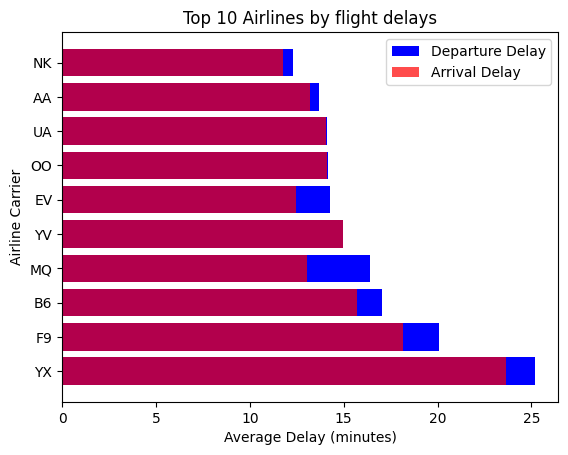

In [38]:
#2
#Filter the data
carrier_delays = filtered_df.groupby('CARRIER_CODE').agg(
    min_dep_delay=('DEP_DELAY', 'min'),
    max_dep_delay=('DEP_DELAY', 'max'),
    avg_dep_delay=('DEP_DELAY', 'mean'),
    min_arr_delay=('ARR_DELAY', 'min'),
    max_arr_delay=('ARR_DELAY', 'max'),
    avg_arr_delay=('ARR_DELAY', 'mean')
).reset_index()

print(carrier_delays)

#Get the top 10 results
carrier_delays_Top10 = carrier_delays.nlargest(10, 'avg_dep_delay')

#Show the plot
plt.barh(carrier_delays_Top10['CARRIER_CODE'], carrier_delays_Top10['avg_dep_delay'], color='blue', label='Departure Delay')
plt.barh(carrier_delays_Top10['CARRIER_CODE'], carrier_delays_Top10['avg_arr_delay'], color='red', alpha=0.7, label='Arrival Delay')
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Airline Carrier")
plt.title("Top 10 Airlines by flight delays")
plt.legend()
plt.show()



## Analysis of minimum, maximum and average arrival and departure delays for each Airline/Carrier

All airlines have had at least one flight with no departure or arrival delays, the airline with the highest maximum departure delay was YV with a departure 2209 min late (1.5 days) the airline with the highest maximum arrival was also YV with an arrival 2206 minutes late. However, on average the airline that is most prone to flight delays is YX (republic airlines), which has, on average, over 20 minutes departure delay and over 25 minutes arrival delay.


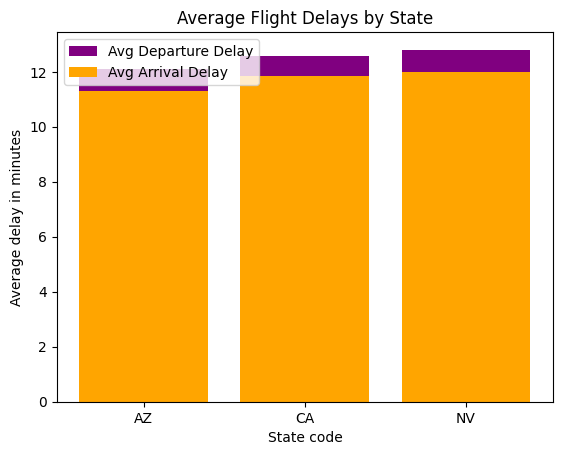

In [ ]:
#3

# #Analyze by region
region_delays = filtered_df.groupby('ORIGIN_ST').agg(
    avg_dep_delay=('DEP_DELAY', 'mean'),
    avg_arr_delay=('ARR_DELAY', 'mean')
).reset_index()

plt.bar(region_delays['ORIGIN_ST'], region_delays['avg_dep_delay'], color='purple', label='Departure Delay')
plt.bar(region_delays['ORIGIN_ST'], region_delays['avg_arr_delay'], color='orange', label='Arrival Delay')
plt.xlabel("State code")
plt.ylabel("Average delay in minutes")
plt.title("Average Flight Delays by State")
plt.legend()
plt.show()




## Analysis

The airline that is most prone to flight delays is YX (republic airlines), which has, on average, over 20 minutes departure delay and over 25 minutes arrival delay.

The state that is most prone to delays is Nevada with a 12 minutes average for arrival delays and over 12 minutes for average departure delays.

## Question 5 - (30 Points)

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


In [ ]:
#Write your python code to answer question 5. You can add new cells below as needed.

## Question 6 - (20 Points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.



In [ ]:
#Write your python code to answer question 6. You can add new cells below as needed.

## Question 7 - Summary

Summarize the overall analysis and share THREE (3) key findings.
